In [1]:
import pandas as pd

# Load the data
file_path = 'NVIDIA.csv'  # Update this with the actual file path
df = pd.read_csv(file_path)

# Convert 'Date' to datetime type
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Ensure other columns are numeric
df['Close/Last'] = df['Close/Last'].str.replace('$', '').astype(float)
df['Volume'] = df['Volume'].astype(int)
df['Open'] = df['Open'].str.replace('$', '').astype(float)
df['High'] = df['High'].str.replace('$', '').astype(float)
df['Low'] = df['Low'].str.replace('$', '').astype(float)

print(df.head())


            Close/Last     Volume    Open    High     Low
Date                                                     
2024-07-09      131.38  287020800  130.35  133.82  128.65
2024-07-08      128.20  237677300  127.49  130.77  127.04
2024-07-05      125.83  214176700  127.38  128.85  125.68
2024-07-03      128.28  215749000  121.66  128.28  121.36
2024-07-02      122.67  218374000  121.13  123.41  121.03


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go


In [3]:
# Line plot of closing price
plt.figure(figsize=(14, 7))
plt.plot(df['Close/Last'], label='Close Price')
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

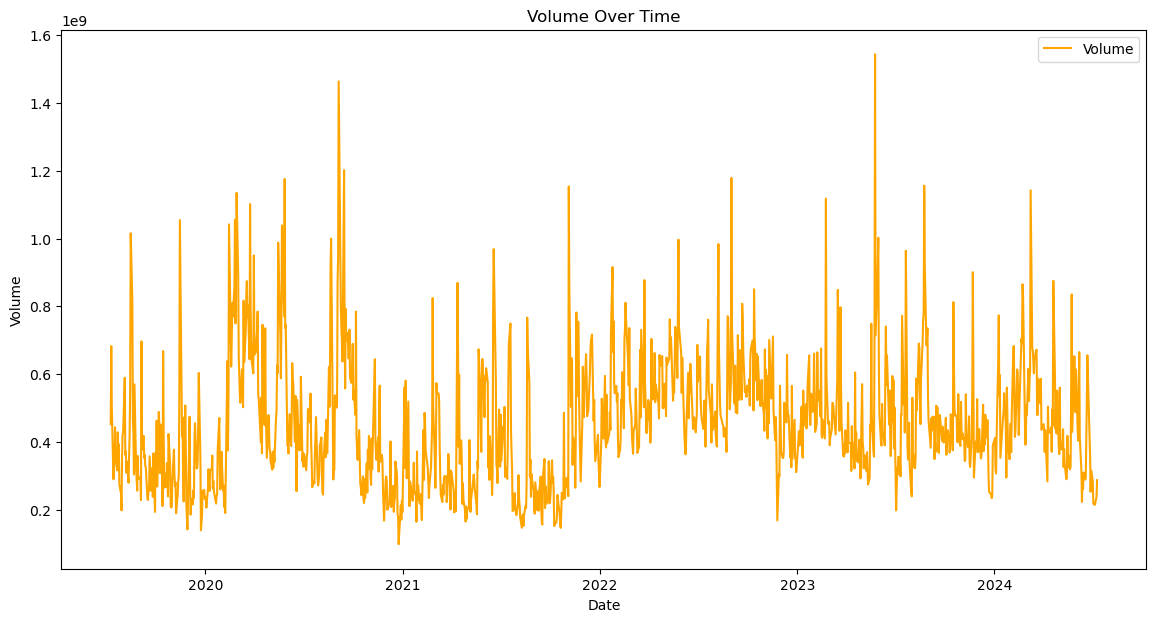

In [4]:
# Volume plot
plt.figure(figsize=(14, 7))
plt.plot(df['Volume'], label='Volume', color='orange')
plt.title('Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

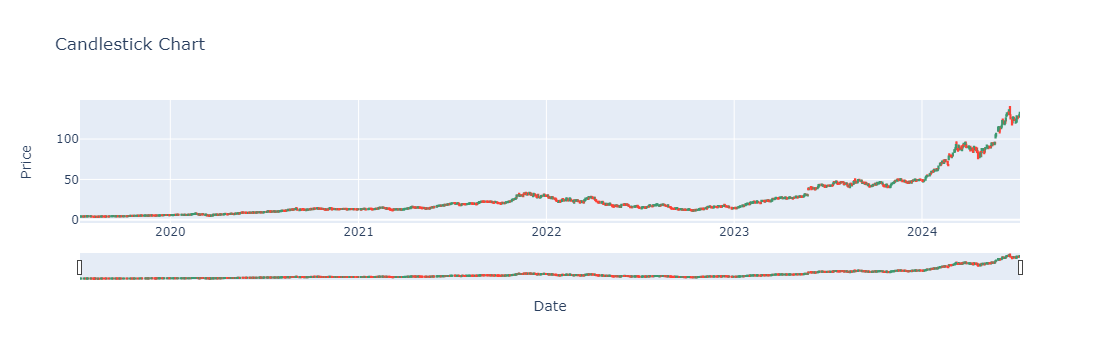

In [5]:
# Candlestick Plot
fig = go.Figure(data=[go.Candlestick(x=df.index,
                                     open=df['Open'],
                                     high=df['High'],
                                     low=df['Low'],
                                     close=df['Close/Last'])])
fig.update_layout(title='Candlestick Chart',
                  xaxis_title='Date',
                  yaxis_title='Price')
fig.show()

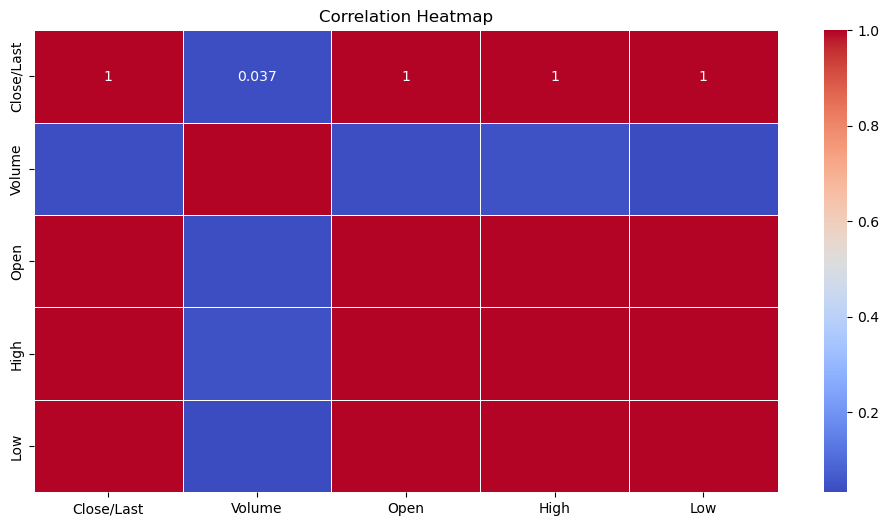

In [6]:
# Correlation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

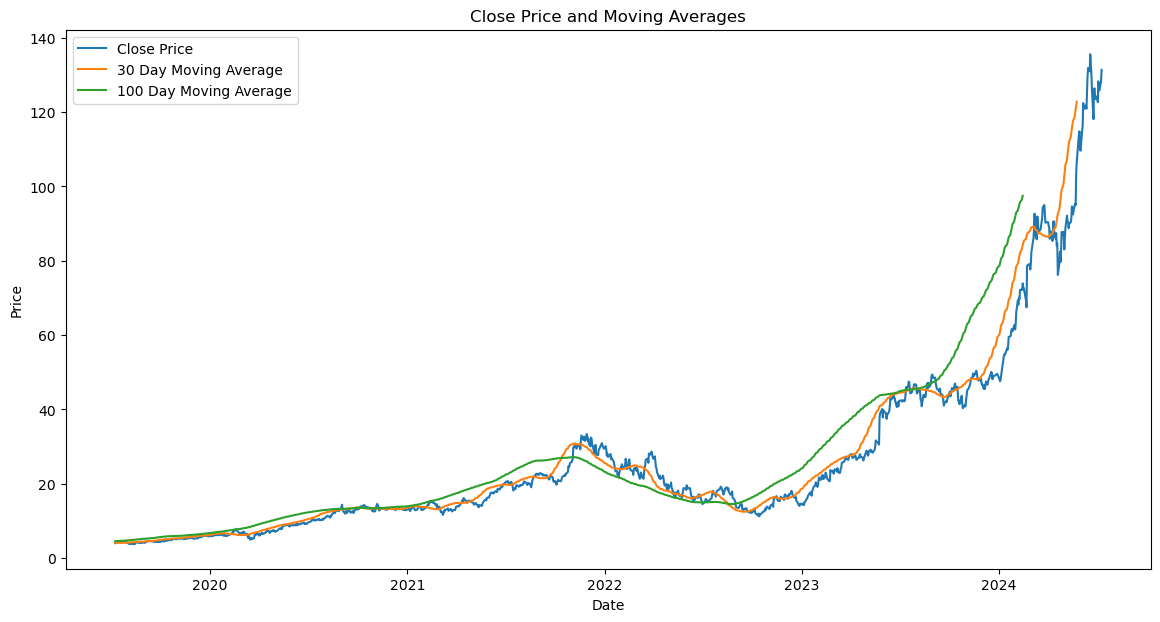

In [7]:
# Moving Averages
df['30_MA'] = df['Close/Last'].rolling(window=30).mean()
df['100_MA'] = df['Close/Last'].rolling(window=100).mean()

plt.figure(figsize=(14, 7))
plt.plot(df['Close/Last'], label='Close Price')
plt.plot(df['30_MA'], label='30 Day Moving Average')
plt.plot(df['100_MA'], label='100 Day Moving Average')
plt.title('Close Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [9]:
import ta

# Adding technical indicators
df['RSI'] = ta.momentum.rsi(df['Close/Last'], window=14)
df['MACD'] = ta.trend.macd_diff(df['Close/Last'])
df['Bollinger_High'] = ta.volatility.bollinger_hband(df['Close/Last'], window=20)
df['Bollinger_Low'] = ta.volatility.bollinger_lband(df['Close/Last'], window=20)

# Lag features
df['Close_Lag1'] = df['Close/Last'].shift(1)
df['Daily_Return'] = df['Close/Last'].pct_change()

# Drop missing values from moving averages calculations
df.dropna(inplace=True)

print(df.head())


            Close/Last     Volume    Open    High     Low      30_MA  \
Date                                                                   
2024-02-14      73.900  504917400  73.202  74.236  71.938  84.217083   
2024-02-13      72.128  602580200  70.400  73.450  69.620  83.613017   
2024-02-12      72.248  613710200  72.600  74.611  71.250  82.935917   
2024-02-09      72.133  436636900  70.533  72.185  70.212  82.173617   
2024-02-08      69.641  414422100  70.074  70.794  69.455  81.352017   

               100_MA        RSI      MACD  Bollinger_High  Bollinger_Low  \
Date                                                                        
2024-02-14  97.470515  38.045099 -0.788514       95.529724      66.367276   
2024-02-13  96.877995  35.858117 -0.622350       94.324627      65.696373   
2024-02-12  96.318475  36.125895 -0.442974       92.619325      65.435175   
2024-02-09  95.781505  35.970911 -0.278707       91.883521      64.806879   
2024-02-08  95.195115  32.697400 

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Features and target
features = ['Open', 'High', 'Low', 'Volume', 'RSI', 'MACD', 'Bollinger_High', 'Bollinger_Low', 'Close_Lag1', 'Daily_Return']
target = 'Close/Last'

X = df[features]
y = df[target]

In [11]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [12]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

MAE: 0.16268431509334183
RMSE: 0.23872674979015743


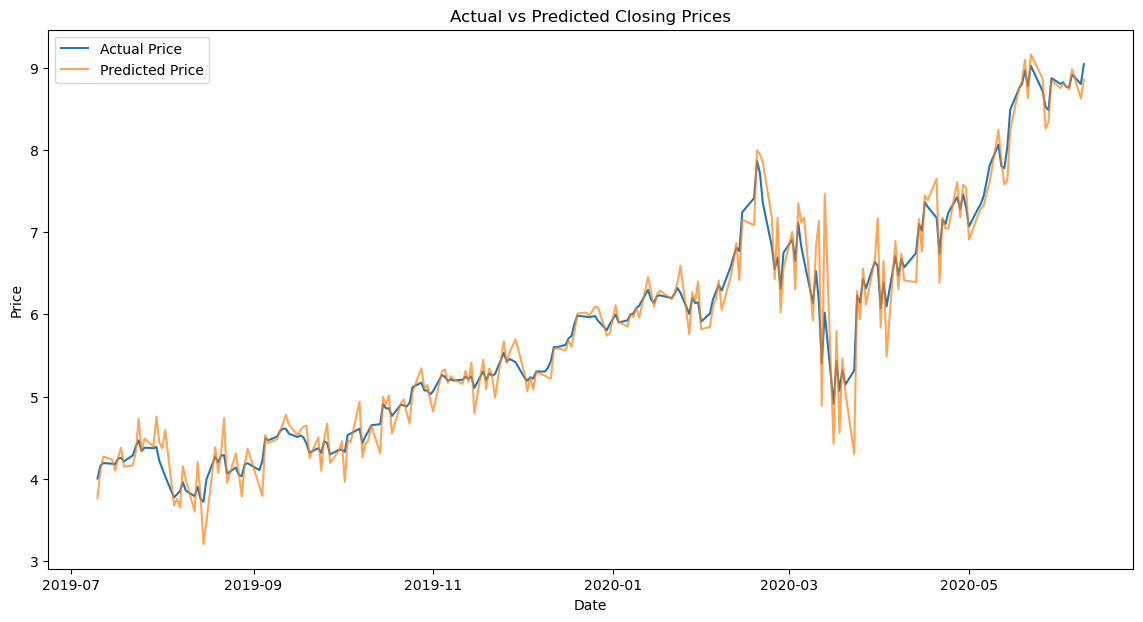

In [13]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

# Plot Actual vs Predicted Values
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Price')
plt.plot(y_test.index, y_pred, label='Predicted Price', alpha=0.7)
plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


2024-07-10 19:13:14.295 
  command:

    streamlit run D:\Users\pc\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


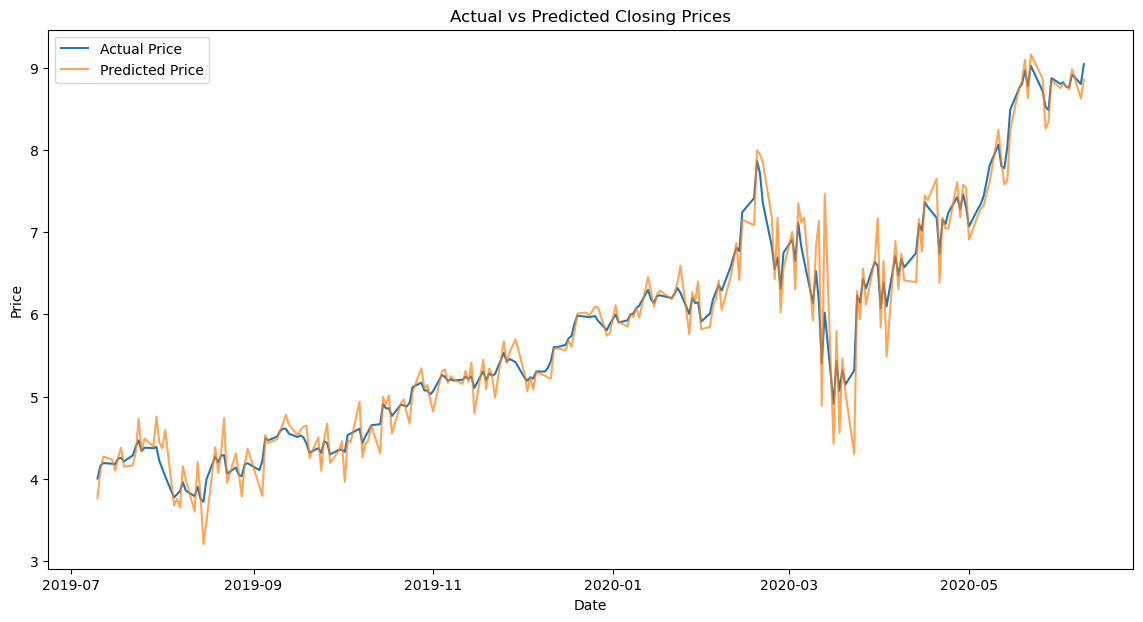

In [14]:
import streamlit as st

# Function to display the data and analysis on the Streamlit dashboard
def display_data(df, y_test, y_pred):
    st.title('Stock Price Analysis and Prediction Dashboard')
    
    st.subheader('Closing Price Over Time')
    st.line_chart(df['Close/Last'])
    
    st.subheader('Volume Over Time')
    st.line_chart(df['Volume'])
    
    st.subheader('Actual vs Predicted Closing Prices')
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.plot(y_test.index, y_test, label='Actual Price')
    ax.plot(y_test.index, y_pred, label='Predicted Price', alpha=0.7)
    ax.set_title('Actual vs Predicted Closing Prices')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend()
    st.pyplot(fig)
    
    st.write(f'Mean Absolute Error: {mae}')
    st.write(f'Root Mean Squared Error: {rmse}')

# Main function for the Streamlit app
def main():
    display_data(df, y_test, y_pred)

if __name__ == "__main__":
    main()
